# 🩺 Heart Disease Prediction: Classification & Evaluation
**Objective:** Predict the presence of heart disease and evaluate the model using high-stakes metrics (Recall vs. Precision).

## 🧪 Phase 1: Data Loading & Exploration
**Goal:** Load the UCI Heart Disease dataset and understand the features (Age, Cholesterol, Max Heart Rate).

## 🤖 Phase 2: Classification Model
**Goal:** Train a Logistic Regression model to classify patients as "Healthy" or "At Risk."

## 📊 Phase 3: Beyond Accuracy (The Confusion Matrix)
**Goal:** Calculate Precision, Recall, and F1-Score to understand the cost of "False Negatives."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset directly from the web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names, na_values="?")

# 2. Preprocess: Target 0 = Healthy, Target > 0 = Disease
# We turn this into a binary problem (0 or 1)
df['target'] = (df['target'] > 0).astype(int)

# 3. Handle 6 missing values in 'ca' and 'thal'
df = df.dropna()

print("Heart Disease Dataset Loaded! 🩺")
print(f"Dataset includes {df.shape[0]} patients and {df.shape[1]} features.")
display(df.head())

Heart Disease Dataset Loaded! 🩺
Dataset includes 297 patients and 14 features.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


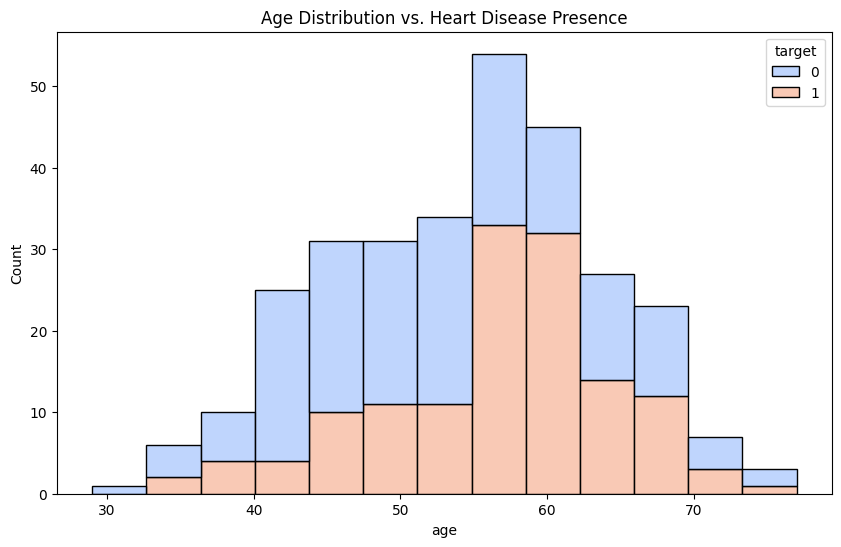

💡 TOP PREDICTORS OF HEART DISEASE:
target     1.000000
thal       0.526640
ca         0.463189
oldpeak    0.424052
Name: target, dtype: float64


In [2]:
# Visualise Age vs. Heart Disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple="stack", palette='coolwarm')
plt.title('Age Distribution vs. Heart Disease Presence')
plt.show()

# Find correlation with target
print("💡 TOP PREDICTORS OF HEART DISEASE:")
print(df.corr()['target'].sort_values(ascending=False).head(4))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Prepare Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# 2. Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling is vital for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Classification Model Trained! 🤖")

Classification Model Trained! 🤖


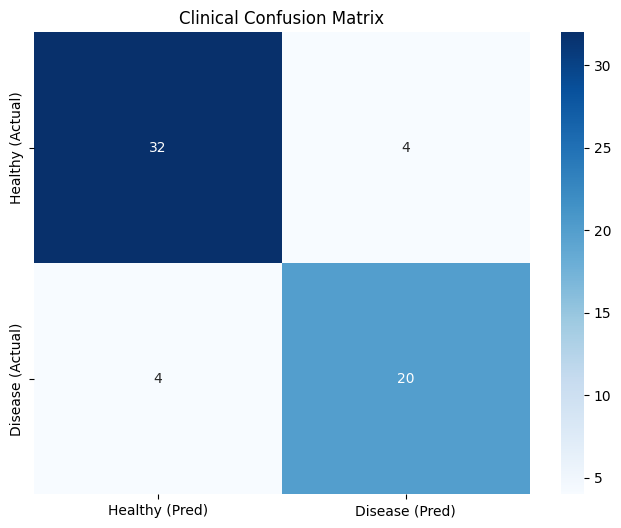

Overall Accuracy: 86.67%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.89      0.89      0.89        36
     Disease       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Make Predictions
y_pred = model.predict(X_test_scaled)

# 2. Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Visualize the Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy (Pred)', 'Disease (Pred)'],
            yticklabels=['Healthy (Actual)', 'Disease (Actual)'])
plt.title('Clinical Confusion Matrix')
plt.show()

# 4. Print Detailed Metrics
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Disease']))